# Review of Random Variables and Processes
Professor: Alberto Rodríguez Martínez.\
Communications Engineering Deparment.\
Miguel Hernandez University of Elche (Spain).

In [12]:
# --- ENVIRONMENT SETUP: works in local Jupyter and Colab ---

import sys
from pathlib import Path

# 1) Detect if we are in Colab
try:
    import google.colab  # type: ignore[unused-import]
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

# 2) If in Colab, clone the repo (if not already cloned) and cd into notebooks/
if IN_COLAB:
    REPO_URL = "https://github.com/TU_USUARIO/my_project.git"  # <-- CAMBIAR
    REPO_NAME = "my_project"                                   # <-- CAMBIAR

    root_path = Path("/content") / REPO_NAME
    if not root_path.exists():
        # Clone the repo into /content
        !git clone {REPO_URL}
    # Go to notebooks folder inside the repo
    %cd /content/{REPO_NAME}/notebooks
else:
    # Local Jupyter: usually the notebook is already running from my_project/notebooks
    # If no, you can add a check here or leave it as is.
    pass

# 3) Now that we are in the correct folder, we can import from "codigo"
#    Add the project root to sys.path so "codigo" is importable
project_root = Path.cwd().parent   # notebooks → my_project
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

# 4) Import config and use its paths
from codigo.config import PROJECT_ROOT, DATA_DIR

print("Running in Colab:", IN_COLAB)
print("Project root:", PROJECT_ROOT)
print("Data dir:", DATA_DIR)

Running in Colab: False
Project root: D:\Dropbox\02 UMH\00 DOCENCIA\02 MASTER\01 TDI TRATAMIENDO DIGITAL INFORMACION\03 NOTEBOOKS JUPITER\statistical_sp
Data dir: D:\Dropbox\02 UMH\00 DOCENCIA\02 MASTER\01 TDI TRATAMIENDO DIGITAL INFORMACION\03 NOTEBOOKS JUPITER\statistical_sp\data


## Random Variables
A Random Variable (RV), $𝑋$, is a function that maps the outcomes of an experiment into numbers. The simplest case is when the outputs of the experiments are directly number, so the is a nuivoc relation between the outcome of the expermient and the random variable. That happens in most of the problems of statistical processing of information. There is something that I measure and I asign to it a value: Stock market, temperature, wind velocity, heigh of the people, voltage of a sensor, etc. In some other cases, there is not a direct relation, I would have to stablsih it. For example, if I want to measure the level of happiness of pleople, or their anxiaty,I would have to apply a rule according to my exam and apply a assign a number (from 0 to 100, for example), to each intermediate level. Then I can apply the same mathematical rules that I apply to every other numerical experiment.

In this notebook, we are going to explore how to analyse and understant Random Variables and their properties. We will use a basic example in most of the sections, which is a constant level embeded in noise. Note that although basic, it is representative of almost everything I want to study. If it is voltage, it would be the electronic thermal noise of the circuit. If it is the value of something, the price would be affected by small random and uncertain fluctuations. If it is the heigh of the people, it would be hte fluctuations due to the measurement process. If it is the anxiety of a subject, it could be errors in the interpretation of their facial expresion or any other measure. Therefore, we will keep this example, and for the ease of understanding, we will think of it as an electronic device measuring the level of a battery, so the result will be a contant plus electronic  noise.

We will also make some assumtions about the random variable. For starters, we will assume that it is actually a random process, wide sense stationary and ergodic. That is, the level of the battery will not change, and the parameters of the noise do not change with time. By the way, this noise will be Additive White Gaussian Noise (AWGN), that is, random values of voltage added to the voltaje of the battery generated by a Normal distribution of mean $\mu$ and mean power (variance) $\sigma^2$, which modell the electronic noise. Again, these asusmtions are common, and very realistic. Almost everything in nature behaves Gaussian-Like, and on th eother hand, almost every effcet of uncertainty in a measurement is the result of the sum of many many small random factors, and the sum of all of them, no matter how they behave, tend to be a Gaussian distribution.

Anyway, don't worry too much about the assumptions, we will discuss them as the concepts appear in the example. So, lets create a model of our problem, so we can study it. Remember that our goal in this lesson is to learn to analyse information affected by uncertainty (random signals!).


<div style="text-align: center;">
    <img src="../images/battery_circuit_reduced.png" alt="Voltage meassurement example" width="200" style="border: 2px solid #4CAF50;">
</div>

We will have to get into bussines now, coding the model. We will have to define the model now. According to our hipothesis, at any time, $x$, the measured signal (sample), will be the sum of the real value of the voltage plus some noise (uncertain/random value), that is, $X=V+n$, with $n$ the value of the noise, modeled as the wait gaussina random variable. Note that the voltage $V$ is deterministic, unknown, but deterministic.

So far, what we have to code is:

$noise \sim N(\mu, \sigma^2)=\frac{1}{\sigma \sqrt{2\pi}} \, e^{-\frac{(x - \mu)^2}{2\sigma^2}}$\
$X=V+noise$ 


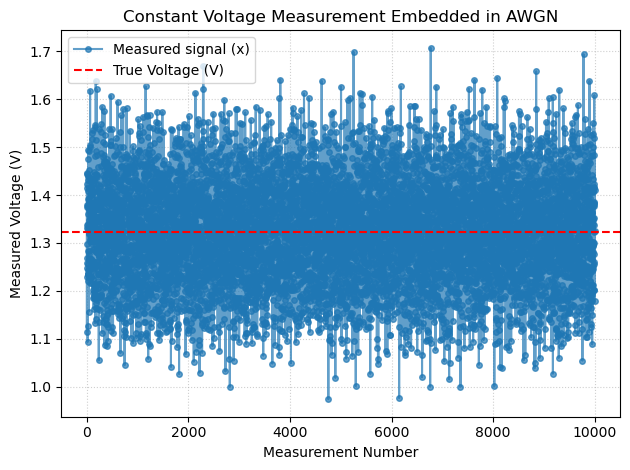

In [1]:
# example of a basic noisy signal - Constant embeded in additive white gaussian noise
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set constans
V = 1.322 # real value of the voltage of the battery, deterministic, constant, but not measurable...
n_mean = 0 # mean of the noise, usually zero
n_var = 0.01 # variance of the noise. For WGN, it is its mean power. It also is a meassure of the variability around its mean.
n_std = np.sqrt(n_var) # standard deviation of the noise.
Num_Samples = 10000 # number os samples, that is, number of measures I do.

# Create the signal. It will have 100 samples, as if we have measured the temperature 100 times and plot it.
# in the same line we add the Num_Samples samples of noise.
noise = np.random.normal(n_mean, n_std, Num_Samples) # Gaussian N(n_mean, n_std^2)
x = V + noise # add the additive noise

# Plot the noisy measurements
plt.plot(x, 'o-', markersize=4, label='Measured signal (x)', alpha=0.7)

# Superimpose the true constant value (V)
plt.axhline(y=V, color='red', linestyle='--', label='True Voltage (V)')

# Add labels and title
plt.xlabel('Measurement Number')
plt.ylabel('Measured Voltage (V)')
plt.title('Constant Voltage Measurement Embedded in AWGN')
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


### Histogram
The first staep when analysing an unknown signal (or phenomena, or experiment, or whatever), is to make the histogram, which in its most basic form it is just counting the frequency of occurrence outcomes. That is, we have to count how many times something hapen. As our Random Variable in this case is continuous, it is uncountable, that is, it can take any value with infinite precisión, that is, infinite decimals, so it is impossible to count. So, we will have to make intervals in the range of the Random Variable and count the number of times a sample has a value whithin each interval. Note that we have to decide here a few things:
* the range: We do that repeating the experiment or measurmeent many times and checking the span of the results. In this case, by simple inspection of the figure, and being a bit conservative, it seems that the values lay in the range $[0, 3]$.
* The numer of bins in which I divide the range. Note that once fixed, and assumins the bins have the same size, it will affect directly the bin size.

Choosing the appropriate bin size for a histogram presents a fundamental dilemma: a trade-off between detail and generalization. If the bins are too narrow, the histogram can become overly detailed, exhibiting a jagged appearance with many empty or sparsely populated bins. This can obscure the underlying distribution, making it difficult to discern overall trends or patterns and potentially highlighting noise in the data. Conversely, if the bins are too wide, the histogram becomes overly generalized, smoothing out important features and potentially masking significant peaks, valleys, or multimodal aspects of the distribution. This loss of detail can lead to an inaccurate representation of the data's true shape, making it challenging to draw meaningful conclusions. The optimal bin size therefore seeks to strike a balance, revealing the underlying structure of the data without being either too noisy or too overly simplified. Finding this balance often involves an iterative process, trying different bin sizes and visually assessing which best communicates the data's story.

Number of bins: 20
Calculated bin width: 0.0367
Bin Edges: [0.97389333 1.01055823 1.04722313 1.08388803 1.12055293 1.15721783
 1.19388273 1.23054764 1.26721254 1.30387744 1.34054234 1.37720724
 1.41387214 1.45053705 1.48720195 1.52386685 1.56053175 1.59719665
 1.63386155 1.67052645 1.70719136]
Counts per bin: [   7   14   50  139  285  520  803 1117 1353 1442 1337 1137  776  533
  257  138   56   25    8    3]


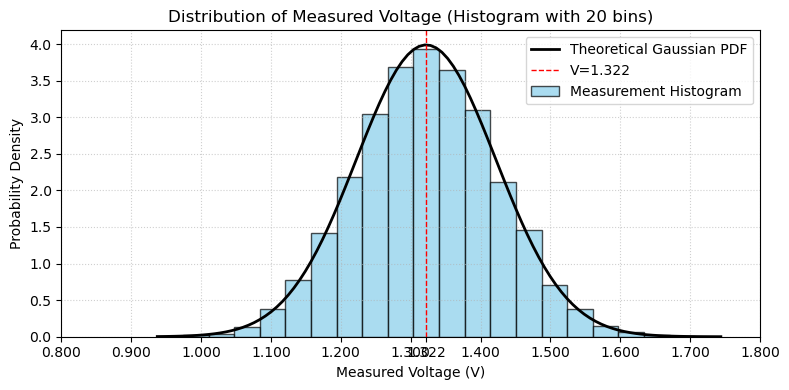

In [2]:
# Histogram Creation using numpy.histogram

# Define the number of bins
num_bins = 20 

# Calculate the histogram data: counts and bin edges
# 'counts' will be an array showing how many data points fall into each bin.
# 'bin_edges' will be an array showing the start and end values for each bin.
counts, bin_edges = np.histogram(x, bins=num_bins, density=False) 
# Note: density=False here for raw counts, we'll normalize for plotting if needed

# Calculate bin width
# The length of bin_edges is num_bins + 1, so we can pick any two adjacent edges
bin_width = bin_edges[1] - bin_edges[0]
print(f"Number of bins: {num_bins}")
print(f"Calculated bin width: {bin_width:.4f}")
print(f"Bin Edges: {bin_edges}")
print(f"Counts per bin: {counts}")


# --- Plotting the histogram ---
plt.figure(figsize=(8, 4))

# For plotting with plt.bar, we need to manually normalize if density=True is desired
# We calculate the height of each bar (count / (total_samples * bin_width))
# Or, simpler, we can just use the counts and set density=True in hist if we want to plot that way.
# For direct plotting with counts, we'll plot the raw counts on the y-axis.

# To get probability density on y-axis, we need to normalize the counts:
normalized_counts = counts / (Num_Samples * bin_width)
"""
Here's how we manually convert our raw counts into probability density.
We divide each count by the total number of samples (Num_Samples) and by the bin_width.
This ensures that the area of all our histogram bars will sum up to 1, making it comparable to our theoretical Gaussian PDF."
Thinking Point: If we didn't divide by bin_width, what would the sum of the bar heights be?
It would sum to 1, but it wouldn't be 'density' in the sense of area summing to 1.

The same could be achieved setting density=True when we called np.histogram
"""

# Plot the bars
# We use bin_edges[:-1] for the x-coordinates because `plt.bar` expects
# the left edge of each bar. There are `num_bins` bars.
plt.bar(bin_edges[:-1]+bin_width/2, normalized_counts, width=bin_width, 
        alpha=0.7, color='skyblue', edgecolor='black', label='Measurement Histogram')

# Superimpose the theoretical Gaussian distribution for comparison
"""
we can do it because we have generated the noisy signal with known parametes.
in a real experiment, what we wuld like to study is the behavior of the signal, 
and we wold know nothing about it.
"""
xmin, xmax = plt.xlim() # Get current x-limits for plotting the curve
x_axis = np.linspace(xmin, xmax, 100)
p = norm.pdf(x_axis, V, n_std)
plt.plot(x_axis, p, 'k', linewidth=2, label='Theoretical Gaussian PDF')
plt.axvline(V, color='r', linestyle='--', linewidth=1, label=rf'V={V}')
# add tick in x axis at the value of the actual voltage
ticks_old = plt.xticks()[0]
tick_new = list(ticks_old) + [V]
plt.xticks(tick_new)

# Add labels and title
plt.xlabel('Measured Voltage (V)')
plt.ylabel('Probability Density') # Updated label since we are plotting density
plt.title(f'Distribution of Measured Voltage (Histogram with {num_bins} bins)')
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

### Empirical mean, variance and standard deviation
Now we can start trying to calculate statistic moments or parametrs of the unknown signal model (just 'statistics'). As we have assumed that the signal is stationary (in fact we assume that it is ergodic), we could estimate the statistics using the averages as we saw in theory.

For the expectation or mean:
$$
E[X]=\mu_{X}=\int_{}^{}X\cdot fdp_X(x)\partial x\overset{\underset{\mathrm{egodic}}{}}{=}\frac{1}{N}\sum_{1}^{N}x[n]
$$

For the variance:\
$$
E[(X-\mu_X)^2]=var_{X}=\sigma^2_X=\int_{}^{}(X-\mu_X)^2\cdot fdp_X(x)\partial x\overset{\underset{\mathrm{egodic}}{}}{=}\frac{1}{N}\sum_{1}^{N}(x[n]-\mu_X)^2
$$


And the standard deviation would be just the square root of the variance.


In [3]:
# mean, variance, stand dev
from IPython.display import display, Math, Latex

"""
I am going to use the formal mathematical equations just for you to remember where they come from.
Usually we use the function numpy.mean(), or numpy.var for the variance
"""
N = np.size(x) # check the mber of samples of x
mean_X = 1/N * np.sum(x) # calculates the average
#mean_X = np.mean(x) # that is the other option

var_X = 1/N * np.sum((abs(x - mean_X)**2)) # calculates the variance
#var_X = np.var(x) # using numpy

std_X = np.sqrt(var_X) # calcuates the standar deviation

display(Math(fr"\mu_X = {float(mean_X):.3f}\ volts"))
display(Math(fr"\sigma^2_X = {float(var_X):.3f}"))
display(Math(fr"std = {float(std_X):.3f}\ volts"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Probability density function and calculation of probability
Once we have deduced that our signal is a constant embeded in additive WGN, we can now assume that it sprobability density function is a Gaussian, with mean the estimated mean $\mu_X=1.322$ and variance $\sigma^2_X=0.1$. We can plot the densiy function. 

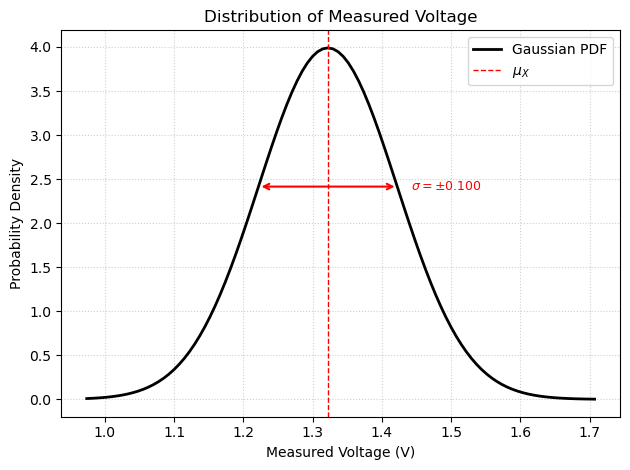

In [4]:
# examples of probability density function
# Superimpose the theoretical Gaussian distribution for comparison
"""
we can do it because we have generated the noisy signal with known parametes.
in a real experiment, what we wuld like to study is the behavior of the signal, 
and we wold know nothing about it.
"""
# get the limits of the variable to represent only in that interval
xmax = max(x)
xmin = min(x)
x_axis = np.linspace(xmin, xmax, 100)
p = norm.pdf(x_axis, V, n_std)
plt.plot(x_axis, p, 'k', linewidth=2, label='Gaussian PDF')
plt.axvline(V, color='r', linestyle='--', linewidth=1, label=rf'$\mu_X$')

# plot σ
y_sigma = norm.pdf(mean_X + std_X, loc=mean_X, scale=std_X)
plt.annotate(
    '',
    xy=(mean_X - std_X, y_sigma),
    xytext=(mean_X + std_X, y_sigma),
    arrowprops=dict(arrowstyle='<->', lw=1.5, color='r')
)
# label
plt.text(mean_X + std_X + std_X * 0.2, y_sigma,
         rf'$\sigma=\pm{std_X:.3f}$', color='r',
         ha='left', va='center', fontsize=9)

# Add labels and title
plt.xlabel('Measured Voltage (V)')
plt.ylabel('Probability Density') # Updated label since we are plotting density
plt.title(f'Distribution of Measured Voltage')
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

Remember that as $X$ it a continuous uncountable random variable, we can calculate probabilities of intervals, but not of particular events. The probability of an event occurring within a certain range for a continuous distribution like the Gaussian is given by the area under the +pdf+ curve within that range. We use the Cumulative Distribution Function (CDF) for this:
$$
F(X)=P(X\leq a)=\int_{-\infty }^{a}f_X(x)\partial x
$$
gives the probability that a random variable $X$ is less than or equal to a certain value $a$. To find the probability $P(a≤X≤b)$, we can calculate 
$$
P(a\leq X \leq b) = F(b)−F(a)
$$
Finally, if we want to calculate $P(X> a)$, then we can calculate simply as $1-P(X\leq a)$, as we know that the total probability has to be $1$.

Unfortunatelly, the indefinite integral of the Gaussian has no elementary antiderivative, so you cannot “integrate it directly.” Instead, we use special functions and/or tables to calculate CDF's. The easiest way is to use the library *scipy.stats*, which allos as to create distributions as objetcs and use specific funcionts of the distribuciton, as the Cumulative Fuction. 

We are going to see in the next example how to create a distribution using the parameters we have from the data, and the plot it, and calculate probailities of intervals using the CDF.

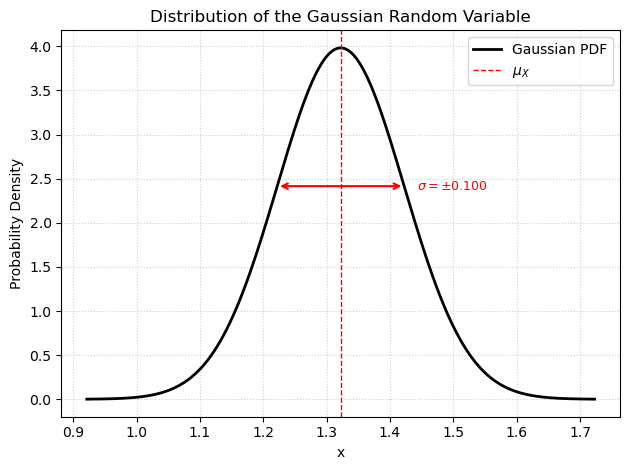

In [5]:
from scipy.stats import norm # For the Normal (Gaussian) distribution

# Create a Normal distribution object, with loc=mean and scale=standard deviation
my_gaussian_dist = norm(loc=mean_X, scale=std_X)

# Generate the range of the distribution
"""
usually 4 times the standar deviation, but you can use which ever you want
"""
x = np.linspace(mean_X - 4*std_X, mean_X + 4*std_X, 500)

# Calculate PDF for these x values
pdf_values = my_gaussian_dist.pdf(x)

plt.plot(x, pdf_values, 'k', linewidth=2, label='Gaussian PDF')
plt.axvline(mean_X, color='r', linestyle='--', linewidth=1, label=rf'$\mu_X$')

# plot σ
y_sigma = norm.pdf(mean_X + std_X, loc=mean_X, scale=std_X)
plt.annotate(
    '',
    xy=(mean_X - std_X, y_sigma),
    xytext=(mean_X + std_X, y_sigma),
    arrowprops=dict(arrowstyle='<->', lw=1.5, color='r')
)
# label
plt.text(mean_X + std_X + std_X * 0.2, y_sigma,
         rf'$\sigma=\pm{std_X:.3f}$', color='r',
         ha='left', va='center', fontsize=9)

# Add labels and title
plt.xlabel('x')
plt.ylabel('Probability Density') # Updated label since we are plotting density
plt.title(f'Distribution of the Gaussian Random Variable')
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

Now we will calculate the probability of different regions as an example, which we will fill as areas in the pdf. Remember taht the probabilities are the areas under the curve.

1. $P(X\leq 1)$
2. $P(1<X\leq 1.5)$
3. $P(X>1.5)$

P(X ≤ 1.2) = 0.1112
P(1.2 < X ≤ 1.5) = 0.8508
P(X > 1.5) = 0.0380


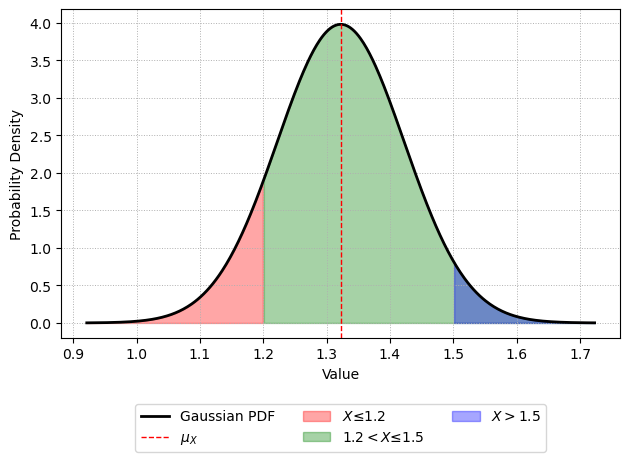

In [6]:

# --- probability ---
# set t he thresholds
a = 1.2
b = 1.5
p_below_a = my_gaussian_dist.cdf(a)
p_above_b = 1-my_gaussian_dist.cdf(b)
p_between = my_gaussian_dist.cdf(b) - my_gaussian_dist.cdf(a)

print(f"P(X ≤ {a}) = {p_below_a:.4f}")
print(f"P({a} < X ≤ {b}) = {p_between:.4f}")
print(f"P(X > {b}) = {p_above_b:.4f}")

# --- threshold line ---
plt.plot(x, pdf_values, 'k', linewidth=2, label='Gaussian PDF')
plt.axvline(mean_X, color='r', linestyle='--', linewidth=1, label=rf'$\mu_X$')


# --- fill areas ---
"""
first find range for specific condition, and then plot areas of those ranges
"""
x_below_a = x[x <= a]
x_between = x[x > a]
x_above_b = x[x > b]

plt.fill_between(x_below_a, my_gaussian_dist.pdf(x_below_a), color='red', alpha=0.35, label=rf'$X ≤ {a}$')
plt.fill_between(x_between, my_gaussian_dist.pdf(x_between), color='green', alpha=0.35, label=rf'${a} < X ≤ {b}$')
plt.fill_between(x_above_b, my_gaussian_dist.pdf(x_above_b), color='blue', alpha=0.35, label=rf'$X > {b}$')

# --- labels and format ---
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.18), ncol=3)
plt.grid(True, linestyle=':', linewidth=0.7)
plt.tight_layout()
plt.show()

## Multivariate random variables & relationships

Once we have some basic skills about how to characterice random variables, lets get into something more complocated. Multidimensional random variables. In order to make it easier to follow, we are going to connect the concepts with an example.

In a university dart competition, we want to analyze the performance of different dart players.
For each throw, the impact coordinates $(x_i, y_i)$ are recorded, measured in millimeters relative to the center of the dartboard. 

<div style="text-align: center;">
    <img src="../images/dart_players.png" alt="Darts" width="300" style="border: 2px solid #4CAF50;">
</div>

**Objective:** Without knowing how they throw, we want to:

* Infer the distribution of impacts along each axis.
* Assess whether the X and Y axes are independent.
* Calculate covariance, correlation, and fit a reasonable probabilistic model.

**Methodology (Scientific):**
* Data Collection → $(x_i, y_i)$ measurements.
* Descriptive Analysis → Scatter plots and histograms.
* Hypothesis Formulation → Independence, normality, isotropy.
* Testing and Adjustment → Parameter estimation, correlation calculation, normality test.
* Probabilistic Model → Estimated joint density function.

We will start by loading the data of the games we have. They correspond to three diffent players: A, B and C.
In this experiment, each throw lands at coordinates $(X, Y)$ measured in millimeters relative to the board center. We do not assume any model a priori. Instead, we will discover the probabilistic structure from data.




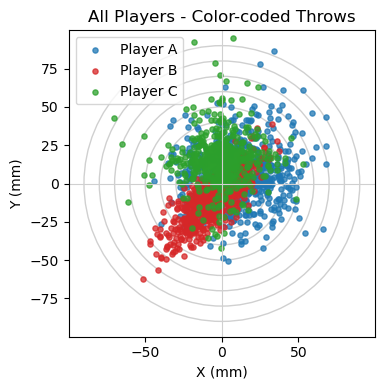

In [19]:
# Data collection
"""
As we have no idea about the data, the first will be to plot the players shots'.
"""
import numpy as np
from codigo.config import DATA_DIR   # already imported in setup cell

# File inside data/datafolder1/mydata.csv
file_path = DATA_DIR / "darts_data_means" / "darts_A.csv"
import codigo.dartslab as dl

paths = {
    "A": str(DATA_DIR / "darts_data_means" / "darts_A.csv"),
    "B": str(DATA_DIR / "darts_data_means" / "darts_B.csv"),
    "C": str(DATA_DIR / "darts_data_means" / "darts_C.csv"),
}

datasets = dl.load_many(paths)

#for name, df in datasets.items():
#    print(name, df.shape)
#    print(df.head())

# Show all players together on one dartboard
fig, ax = dl.scatter_all(datasets)


### Scatter plots and Histograms:
* **What do we see here?**

Next will be to analyze each player separately, to see how the Random Variables ${X,Y}$ behave. Now is where we start thinking like engineers: before fitting models or running tests, we must look at the data to form hypotheses and detect problems. The two most informative first‐look plots here are: **Scatter plots** and **marginal's histograms**.

* **Why a scatter plot??**
* **Joint structure**: A scatter plot of $(𝑋,𝑌)$ shows how both variables behave together.
    * **Independence vs. dependence**: a circular, symmetric cloud suggests weak linear dependence; an elongated ellipse indicates linear dependence (non-zero correlation); curved shapes hint at nonlinear dependence.
    * **Anisotropy**: spread larger in one axis than the other → different variances.
    * **Bias/offset**: a cloud whose center is not at $(0,0)$ indicates systematic bias.
    * **Outliers & clusters**: isolated points (data errors or rare events) and multimodality (mixtures of behaviors).
    * **Heteroscedasticity**: spread of $Y$ changing with $X$ (fan shapes) → variance depends on level, which affects modeling and inference.
* **Scale and geometry**: Using equal aspect ratio avoids visual distortion of the dependency pattern.

* **Why histograms of $𝑋$ and $Y$??**
* **Marginals**: Histograms approximate $f_X$ and $f_Y$, the marginal distributions you’ll later compare to Normal/Laplace, etc.
    * **Shape diagnostics**: symmetry vs. skewness, heavy tails (kurtosis), and multimodality.
    * **Parameter intuition**: rough sense of means and standard deviations before formal estimation.
    * **Model hypotheses**: If both marginals look Gaussian and the scatter looks elliptical, a bivariate Normal is a plausible model; if tails are heavy or there are multiple peaks, consider Laplace or mixtures.
* **Practicalities**: Bin width strongly affects appearance — try several bin counts.

We are now going to plot both for each player.

* **Scatter**: what the shape suggests about correlation, whether the cloud is centered at (0,0), and whether spread is similar in both axes.
* **Histograms**: check marginals: do $X$ and $Y$ look roughly Normal? Are tails heavier than Normal? Is one axis clearly wider? Any skew?

**Connect to theory**:

* If scatter is elliptical and marginals look Normal → hypothesize bivariate Normal; estimate mean/covariance next.
* If marginals look heavy‐tailed → consider Laplace/Student-t; proceed cautiously with tests sensitive to non-Normality.
* If scatter shows curvature or fan shapes → expect nonlinear dependence or heteroscedasticity; Pearson correlation alone may be misleading.

This EDA motivates formal checks (normality tests, covariance/correlation, joint vs. product of marginals, χ² independence test) and ultimately the model choice.

This makes the analysis process explicit: observe → hypothesize → test → model.

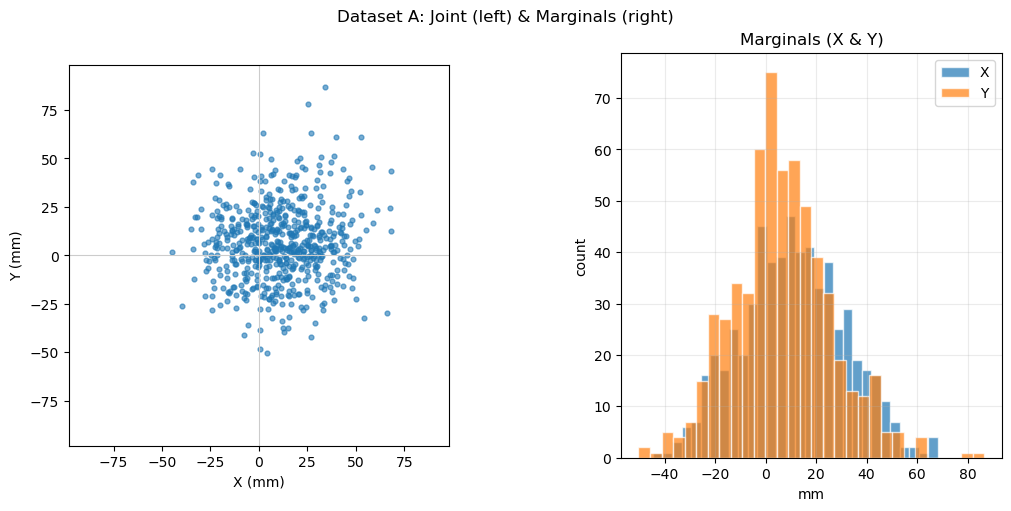

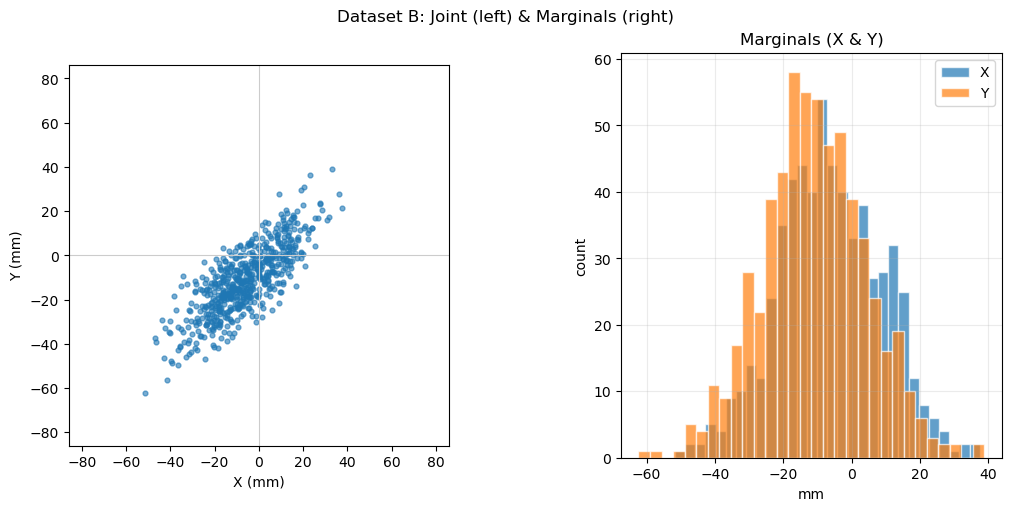

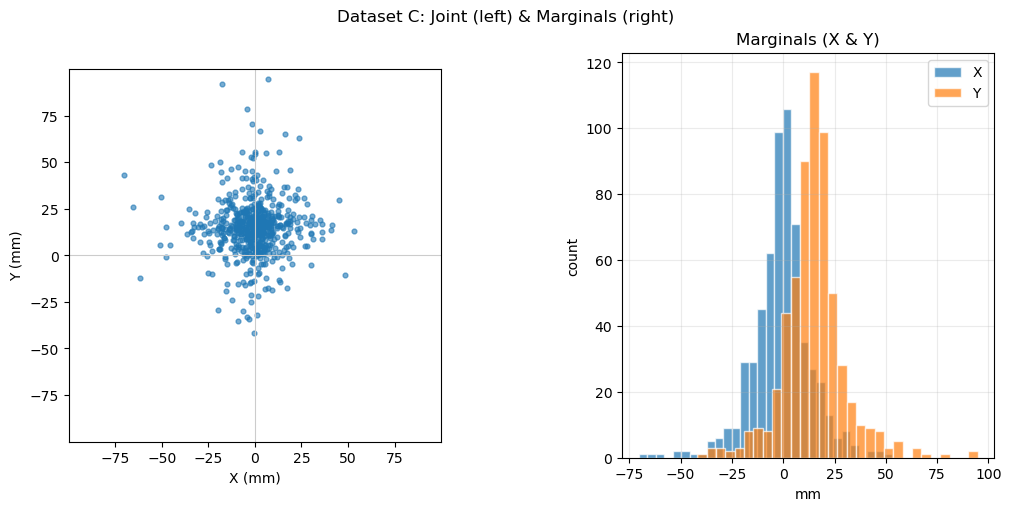

In [20]:
"""
    Visualize the *joint* distribution of X and Y.
    What to read from this plot:
      - Overall shape (circular vs. elongated ellipse) -> hints at independence vs. linear dependence.
      - Orientation (tilt) -> sign of correlation (up-right = positive; up-left = negative).
      - Center (mean) -> bias if not near (0,0).
      - Spread along axes -> different variances in X and Y (anisotropy).
      - Outliers/clusters -> potential data issues or multimodality.
      - Fan shapes -> heteroscedasticity (variance changes with level).

in the function scatter_and_hist, you can set some parameters
scatter_and_hist(
    df: pd.DataFrame,
    title: str = "Scatter (left) and Histograms (right)",
    bins: int = 30,
    density: bool = False,
    ring_guides: bool = True,
    equal_limits: bool = True,
    pad: float = 5.0,
    point_size: float = 12,
    alpha_points: float = 0.6
):
"""
for name, df in datasets.items():
    dl.scatter_and_hist(df, title=f"Dataset {name}: Joint (left) & Marginals (right)", bins=30)




### 3D histograms and pdf's.

* **Interpretation**: both plots summarize the joint distribution of $(𝑋,𝑌)$. Peaks (tall bars/high surface) indicate regions with higher probability mass.
* **Binning sensitivity**: vary bins and observe how conclusions may change—this connects directly to bias–variance trade-offs.
* **Comparison across players**: keep the same bins and axis limits to make comparisons fair.

Here you have an example, repeat for all the players.

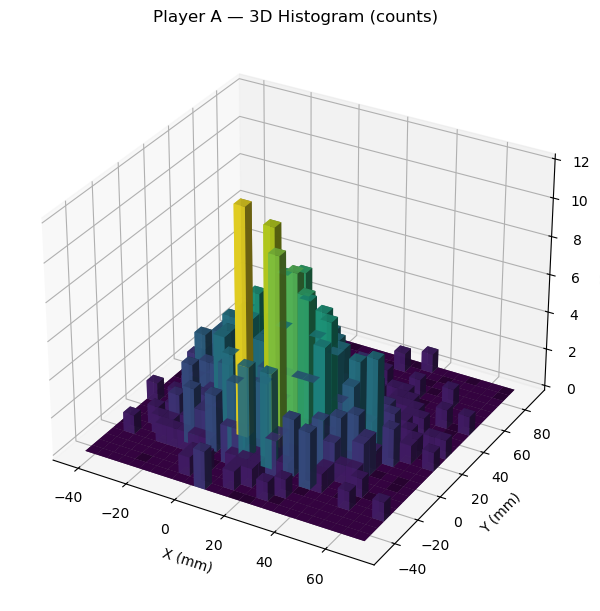

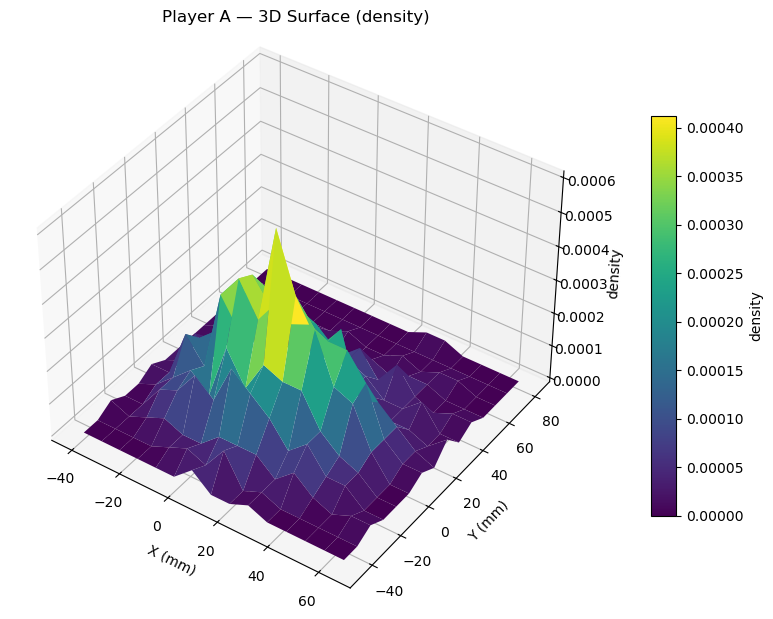

In [31]:
# hist bars:
dfA = datasets["A"]
dl.hist3d_bars(dfA, bins=25, density=False, title="Player A — 3D Histogram (counts)")

# surface:
dl.hist3d_surface(dfA, bins=15, density=True, title="Player A — 3D Surface (density)")


### Marginal Distributions

* **What are “marginals” here?** 
We observe throws as points $(X,Y)$ (mm from the board center).
The marginal distribution of $X$, denoted $f_X(x)$, describes horizontal errors ignoring $Y$. Similarly, $f_Y(y)$ describes vertical errors ignoring $𝑋$. Studying marginals answers: “How does the thrower vary left–right?” and “How does the thrower vary up–down?” independently. 

* **Why do we care?**
    * **Model selection**. If both $X$ and $Y$ look approximately Normal (bell-shaped, symmetric, light tails), a bivariate Normal model becomes a plausible candidate for the joint behavior.
    * **Parameter intuition**. Means indicate systematic bias (off-center aiming); standard deviations indicate precision (spread).
    * **Diagnostics**. Skewness, heavy tails, or multimodality warn you that Normal assumptions may be poor (affecting tests, confidence intervals, and predictions).



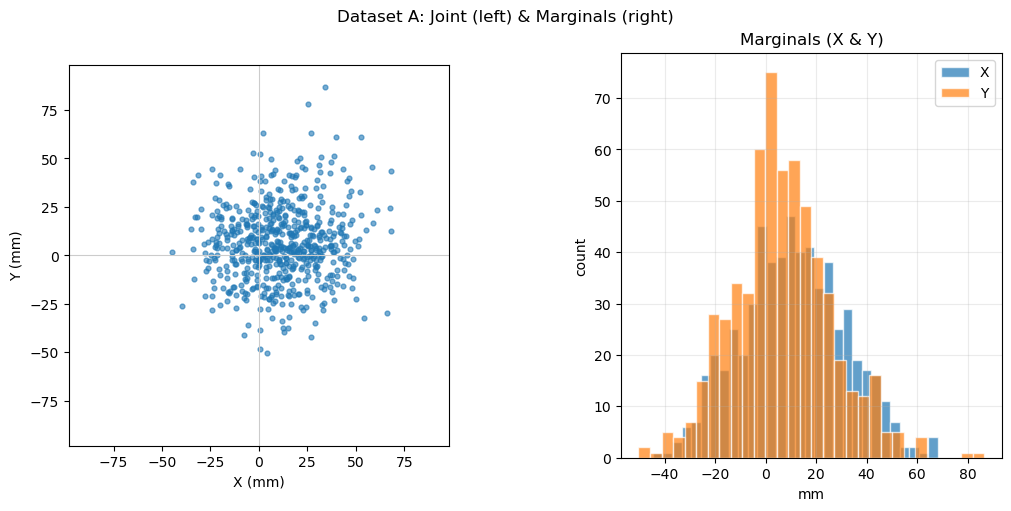

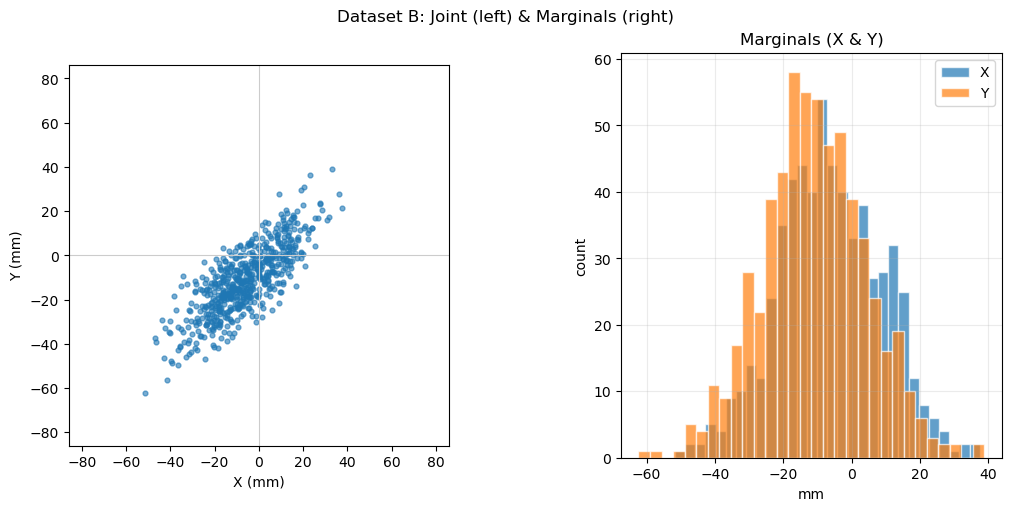

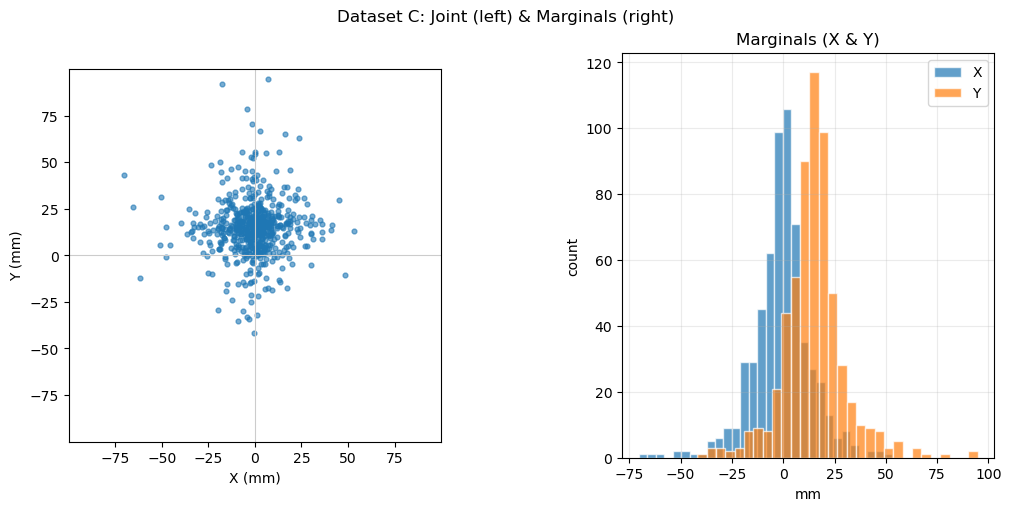

In [32]:
for name, df in datasets.items():
    dl.scatter_and_hist(df, title=f"Dataset {name}: Joint (left) & Marginals (right)", bins=30)

#### Normality Tests
* **How do we assess marginal shape?**
  1. **Visual**:
        * Histograms (try multiple bin counts) for coarse shape.
        * Q–Q plots (recommended): straight line ≈ Normal; curvature or tail deviations ≈ non-Normal.
  2. **Summary statistics**: mean, standard deviation, skewness (asymmetry), kurtosis (tail heaviness).
  3. **Formal tests of normality**: provide a p-value to quantify evidence against Normal.

* **Which normality tests and what they mean?**
    * **Shapiro–Wilk**.
        * $H_0$: data are Normally distributed.
        * Sensitive and powerful for small–moderate samples; commonly recommended up to a few thousand points.
    * **D’Agostino’s $K^2$** (skewness + kurtosis).
        * $H_0$: data are Normal.
        * Uses sample skewness and kurtosis; good at flagging asymmetry or heavy tails.
    * **Interpreting p-values** ($\alpha = 0.05$ as a convention):
        * $p < 0.05$: evidence against Normal → “reject Normality.”
        * $p ≥ 0.05$: no evidence to reject Normal → “compatible with Normal,” not a proof of Normality.

* **Practical guidance**:

    * **Look first, test second**. Start with the histogram/Q–Q plot; tests formalize what your eyes suggest.
    * **Sample size matters**. With large n, tiny, irrelevant deviations can yield very small p-values (over-sensitivity). With small n, lack of power can miss real deviations. Always pair tests with plots.
    * **Outliers dominate tests**. One or two extreme points can flip a result; check data quality.
    * **Don’t conflate results**.
        * “Normal marginals” do not imply independence or bivariate Normality.
        * You still need to study the joint structure (scatter, covariance/correlation, joint vs product of marginals).

* **What we expect in this case study**

    * **Dataset A** (independent Gaussian): $X$ and $Y$ typically pass normality checks; histograms look bell-shaped.
    * **Dataset B** (correlated Gaussian): marginals still look Normal (dependence is a joint property).
    * **Dataset C** (heavy-tailed): at least one of $X$ or $Y$ often shows heavy tails (peaked center + more extreme values), leading to small p-values in normality tests.

* **If Normality is rejected, then what?**

    * **Consider heavy-tailed models** (Laplace / Student-t) or **mixtures** (if histograms are multimodal).
    * For inference robust to non-Normality, use **rank correlations** (Spearman/Kendall), **median/MAD** for scale, or **bootstrap** for uncertainty.

* **Decision checklist**
    1. Plot histograms and Q–Q plots for $X$ and $Y$.
    2. Compute mean, std, skewness, kurtosis.
    3. Run Shapiro–Wilk and D’Agostino $K^2$; record p-values.
    4. Summarize: “Normal? heavy-tailed? skewed?” for each axis.
    5. Use the conclusion to guide the joint analysis and model choice (bivariate Normal vs alternatives).

**Mindset: Observe → Hypothesize → Test → Model.**

In [33]:
# Example of normality tests
from scipy import stats
import pandas as pd

dfA = datasets["A"]

def normality_tests(values: np.ndarray) -> dict:
    """
    Run Shapiro-Wilk and D’Agostino’s K^2 tests.
    Returns p-values; small p-values (e.g. < 0.05) reject normality.
    """
    # Shapiro
    sh_stat, sh_p = stats.shapiro(values)
    # D’Agostino’s K^2 (skewness+kurtosis)
    k2_stat, k2_p = stats.normaltest(values)
    return {"Shapiro_p": float(sh_p), "DAgostinoK2_p": float(k2_p)}

def summarize_marginals(df: pd.DataFrame) -> pd.DataFrame:
    stats_dict = {}
    for col in ["X", "Y"]:
        arr = df[col].to_numpy()
        st = {
            "mean": float(np.mean(arr)),
            "std": float(np.std(arr, ddof=1)),
            **normality_tests(arr),
        }
        stats_dict[col] = st
    return pd.DataFrame(stats_dict)

display(summarize_marginals(dfA))

,X,Y
mean,10.911369,6.362634
std,20.556467,19.496776
Shapiro_p,0.202381,0.001851
DAgostinoK2_p,0.103483,0.000438


#### Q–Q plots

Q–Q plots (Quantile–Quantile plots) compare the quantiles of your data to the quantiles of a reference distribution (e.g., Normal). They are a diagnostic to check how well a distributional assumption fits your data.

* **How to read them**
    * **Build the plot**:
        * Sort your sample $[x(1)\leq...\leq x(N)]$
        * For each rank $i$ compute the corresponding theoretical quantile $q_i$ of the target distribution (e.g., Normal) at probability $p_i=\frac{i-0.5}{N}$
        * Plot points $(q_i, x(i))$.
    * If points lie on a straight line, your sample is consistent with the reference distribution (up to location/scale).
    * Systematic departures tell you how it deviates:
        * S-shape (concave up then down): heavy tails vs Normal (more extremes than expected).
        * Inverted S: light tails (fewer extremes).
        * Upward curvature in upper tail / downward in lower tail: right-skew.
        * Opposite curvature: left-skew.
        * Slope $≠ 1$: scale mismatch (std different).
        * Intercept $≠ 0$: location bias (mean/median shifted).
* **Why use Q–Q instead of just histograms?**
    * Far less sensitive to binning and gives a precise view of tails.
    * Directly ties deviations to specific distributional features (skew/heavy tails).
* **One-sample vs two-sample Q–Q**
    * **One-sample Q–Q (most common)**: data vs theoretical quantiles (e.g., Normal, Laplace, $t$).
    * **Two-sample Q–Q**: data set A vs data set B to check if they come from the same distribution (points near a line → similar shape; slope/intercept show scale/location differences).

* **Practical guidance**
    * Use both Q–Q plots and formal tests (Shapiro, D’Agostino). Q–Q shows where the misfit is; tests give a p-value.
    * With large $n$, tiny deviations will be visible (and tests may reject). Judge practical vs statistical significance.
    * Draw a reference line (least-squares fit to the points or the “theoretical” line using the target mean/std) to guide the eye.

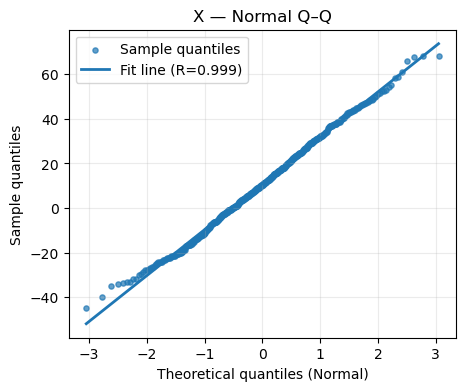

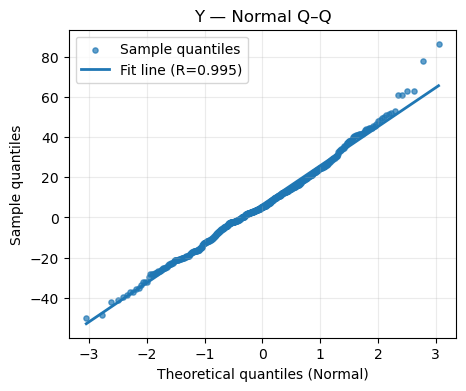

In [34]:
# example of q-q plots
from scipy import stats
import pandas as pd

def qqplot_normal(series, title="Normal Q–Q plot"):
    # stats.probplot returns (theoretical quantiles, ordered responses, fit)
    (osm, osr), (slope, intercept, r) = stats.probplot(series, dist="norm")
    plt.figure(figsize=(5,4))
    plt.scatter(osm, osr, s=14, alpha=0.7, label="Sample quantiles")
    # Reference line (LS fit)
    xline = np.array([osm.min(), osm.max()])
    plt.plot(xline, slope*xline + intercept, lw=2, label=f"Fit line (R={r:.3f})")
    plt.title(title)
    plt.xlabel("Theoretical quantiles (Normal)")
    plt.ylabel("Sample quantiles")
    plt.grid(True, alpha=0.25)
    plt.legend()
    plt.show()

dfA = datasets["A"]
qqplot_normal(dfA["X"], title="X — Normal Q–Q")
qqplot_normal(dfA["Y"], title="Y — Normal Q–Q")


### Joint Density vs Product of Marginals (2D Histogram Comparison)

To compare an empirical joint density with the product of marginals, we:

    1. Build a 2D histogram for $(X,Y)$ → an empirical joint $\hat{f}_{X,Y}$
    2. Build 1D histograms for $X$ and $Y$, → empirical $\hat{f}_{X}$ and $\hat{f}_{Y}$
    3. Compare $\hat{f}_{X,Y}$ and $\hat{f}_{X}\cdot\hat{f}_{Y}$ on the same grid.

If the difference plot is mostly near zero (no clear structure), independence is plausible. Systematic positive/negative regions indicate dependence.

=== Dataset A: Joint vs Product of Marginals ===


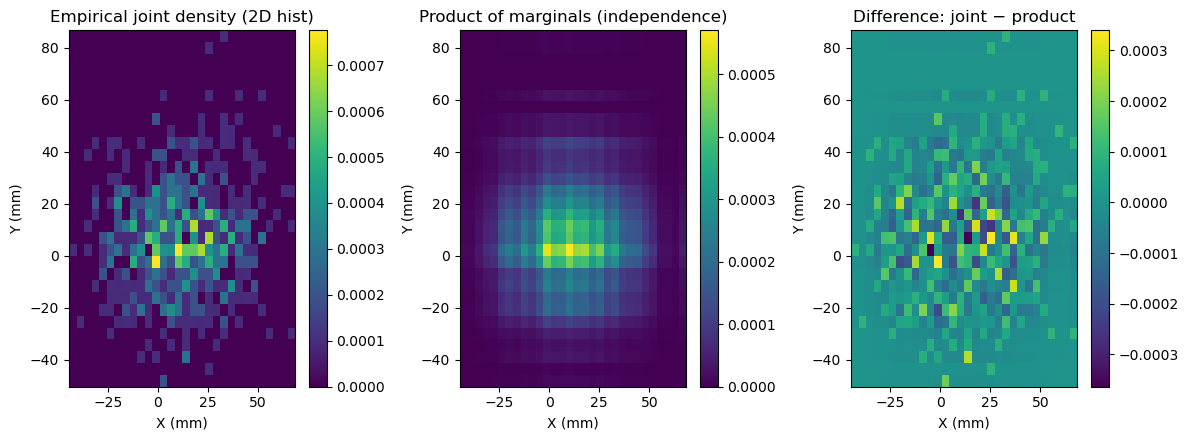

=== Dataset B: Joint vs Product of Marginals ===


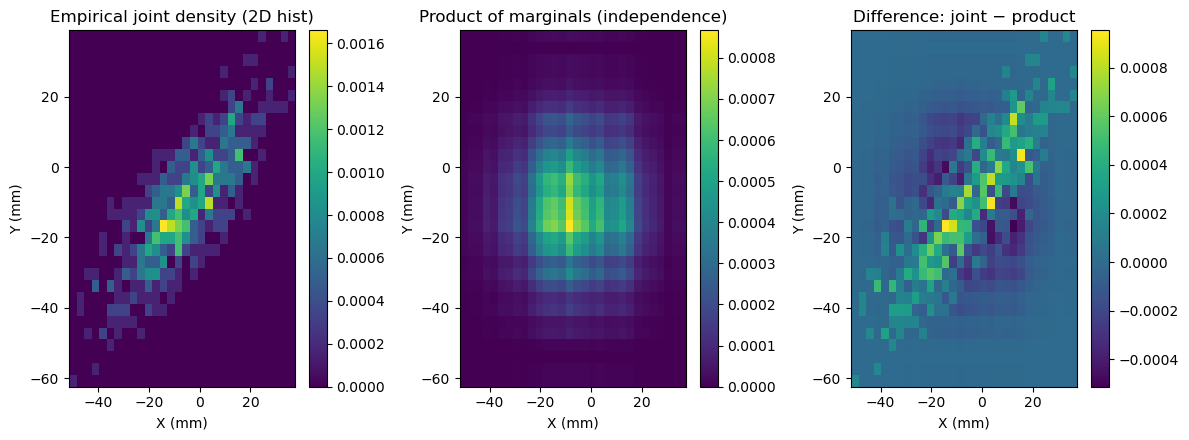

=== Dataset C: Joint vs Product of Marginals ===


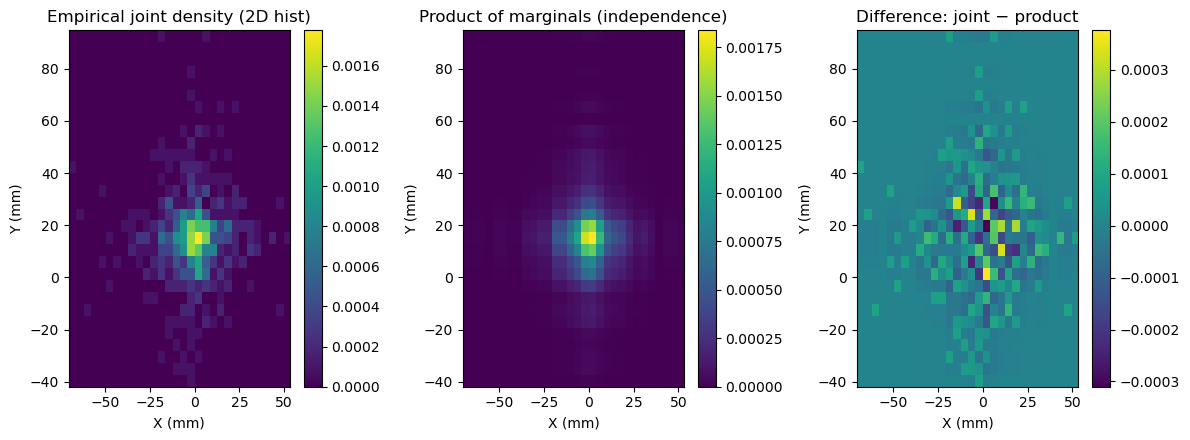

In [35]:
def joint_vs_product(df: pd.DataFrame, bins: int = 30):
    x = df["X"].to_numpy()
    y = df["Y"].to_numpy()

    # Joint histogram
    H, xedges, yedges = np.histogram2d(x, y, bins=bins, density=True)

    # Marginal histograms (as densities on the bin edges)
    fx, xedges1 = np.histogram(x, bins=xedges, density=True)
    fy, yedges1 = np.histogram(y, bins=yedges, density=True)

    # Expected joint under independence: outer product of marginals
    # Note: fx has length bins; H is bins x bins.
    H_indep = np.outer(fx, fy)

    # Visualization
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    plt.figure(figsize=(12,4.5))
    plt.subplot(1,3,1)
    plt.imshow(H.T, origin='lower', aspect='auto', extent=extent)
    plt.title("Empirical joint density (2D hist)")
    plt.xlabel("X (mm)"); plt.ylabel("Y (mm)")
    plt.colorbar()

    plt.subplot(1,3,2)
    plt.imshow(H_indep.T, origin='lower', aspect='auto', extent=extent)
    plt.title("Product of marginals (independence)")
    plt.xlabel("X (mm)"); plt.ylabel("Y (mm)")
    plt.colorbar()

    plt.subplot(1,3,3)
    diff = H - H_indep
    plt.imshow(diff.T, origin='lower', aspect='auto', extent=extent)
    plt.title("Difference: joint − product")
    plt.xlabel("X (mm)"); plt.ylabel("Y (mm)")
    plt.colorbar()
    plt.tight_layout()
    plt.show()

for name, df in datasets.items():
    print(f"=== Dataset {name}: Joint vs Product of Marginals ===")
    joint_vs_product(df, bins=30)

### Covariance & Correlation
* **Covariance**: $COV(X, Y)$ measures linear association, in $mm^2$.
* **Correlation coefficient**: $\rho=Corr(X,Y)$ is scale free.
* $\rho=0$ suggests weak linear dependence; substantial $|\rho|$ suggest linear dependence.


In [36]:
# examples of covariance and correlation
from typing import Tuple, Dict
import pandas as pd
def cov_corr(df: pd.DataFrame) -> Tuple[float, float]:
    x = df["X"].to_numpy()
    y = df["Y"].to_numpy()
    cov = float(np.cov(x, y, ddof=1)[0,1])
    corr = float(np.corrcoef(x, y)[0,1])
    return cov, corr

for name, df in datasets.items():
    cov, corr = cov_corr(df)
    print(f"Dataset {name}: Cov(X,Y) = {cov:.3f},  Corr(X,Y) = {corr:.3f}")

Dataset A: Cov(X,Y) = 30.187,  Corr(X,Y) = 0.075
Dataset B: Cov(X,Y) = 184.097,  Corr(X,Y) = 0.790
Dataset C: Cov(X,Y) = 4.997,  Corr(X,Y) = 0.023


### Conditional distributions 

We can estimate them empirically $f_{Y|X}(y,x_0)$

We approximate $f_{Y|X}$ by conditioning on a small interval of $X$: pick an $x_0$ and a small witdh $\Delta$ and use all points with $x∈[x_0−\Delta,x_0]$.

If the conditional distribution of $Y$ changes with $x_0$ (e.g., mean shifts upward as $x_0$ increases), that signals dependence. If conditionals look similar across $x_0$, independence is more plausible.

=== Dataset A: Conditional densities Y|X≈x0 ===


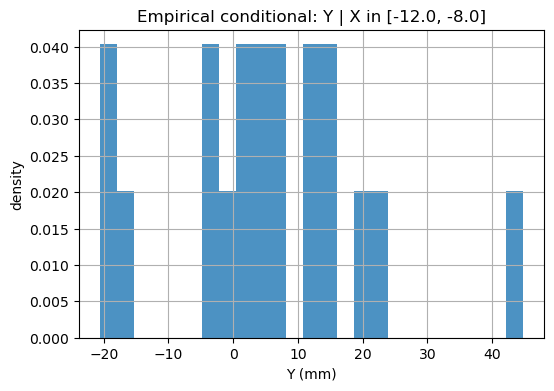

x0=-10.0, points used: 19


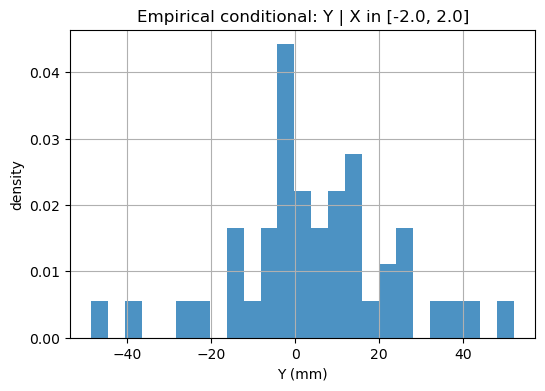

x0=+0.0, points used: 45


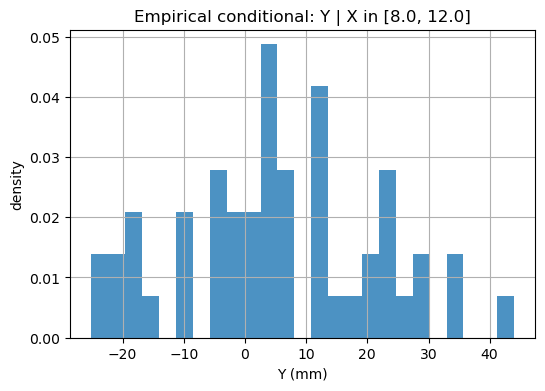

x0=+10.0, points used: 52
=== Dataset B: Conditional densities Y|X≈x0 ===


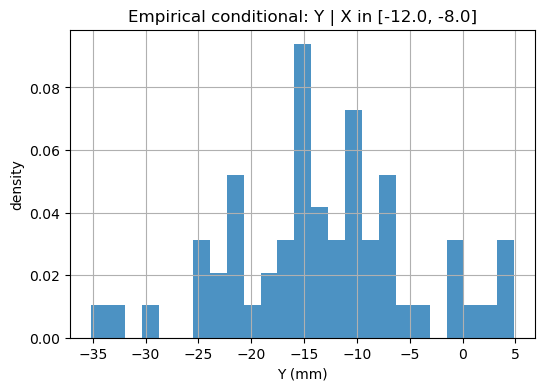

x0=-10.0, points used: 60


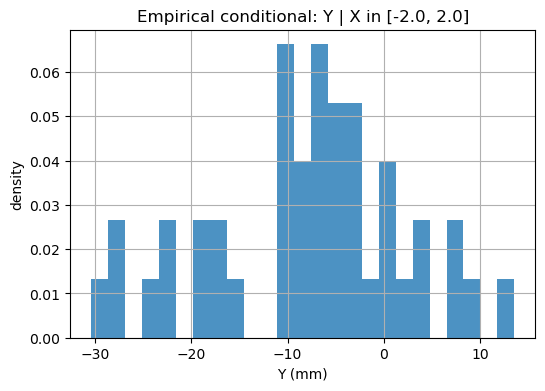

x0=+0.0, points used: 43


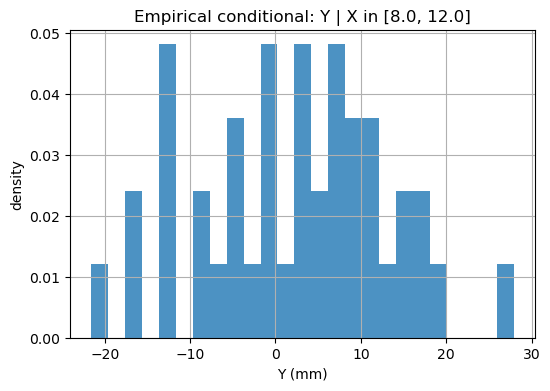

x0=+10.0, points used: 42
=== Dataset C: Conditional densities Y|X≈x0 ===


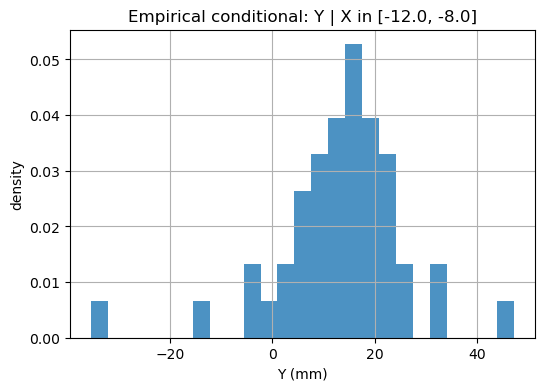

x0=-10.0, points used: 46


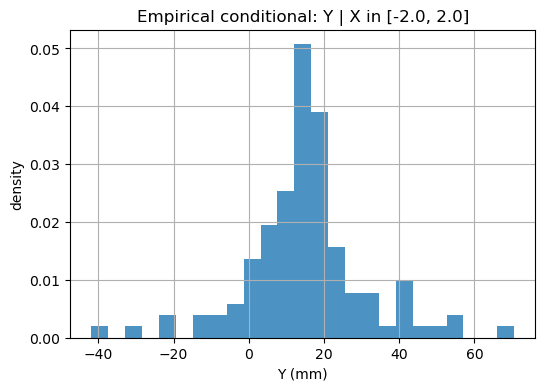

x0=+0.0, points used: 114


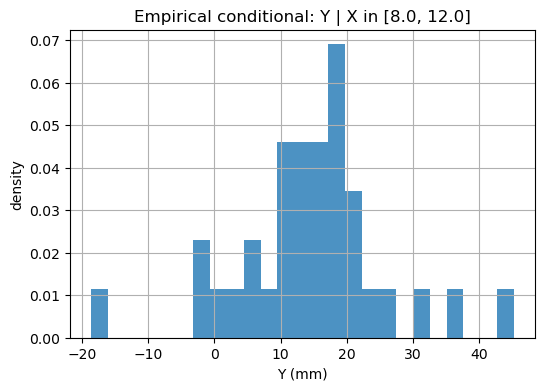

x0=+10.0, points used: 34


In [37]:
def conditional_Y_given_X(df: pd.DataFrame, x0: float, delta: float = 2.0, bins: int = 30):
    x = df["X"].to_numpy()
    y = df["Y"].to_numpy()
    mask = (x >= x0 - delta) & (x <= x0 + delta)
    y_slice = y[mask]
    if y_slice.size < 15:
        print(f"Warning: too few points for a reliable conditional at x0={x0}.")
    plt.figure(figsize=(6,4))
    plt.hist(y_slice, bins=bins, density=True, alpha=0.8)
    plt.title(f"Empirical conditional: Y | X in [{x0-delta:.1f}, {x0+delta:.1f}]")
    plt.xlabel("Y (mm)"); plt.ylabel("density")
    plt.grid(True)
    plt.show()
    return y_slice.size

# Try a few x0 values for each dataset
x0_values = [ -10.0, 0.0, 10.0 ]
for name, df in datasets.items():
    print(f"=== Dataset {name}: Conditional densities Y|X≈x0 ===")
    for x0 in x0_values:
        n_used = conditional_Y_given_X(df, x0, delta=2.0, bins=25)
        print(f"x0={x0:+.1f}, points used: {n_used}")


## Random Processes

A random (stochastic) process ${X(t)}, t∈T$ is a family of random variables indexed by time (continuous), ${X[n]}, n∈Z.$ if discrete in time. As signals usually come from the sampling of continuous signals, we will usually work with discrete signals.

* A realization (or sample path) is one outcome $t↦x(t)$ of the process.
* The ensemble is the collection of all realizations.

Key ensemble moments:

* **Mean function** $\mu[n]=E{X[n]}$
* **Autocorrelation** $R_X[n,m]=E{X[n]X[m]}$
* **Autocovariance** $C_X[n,m]=E{(X[n]-mu[n])(X([m]-mu[m])}$

To fully characterize a Random Process, besides its mean function and autocorrelation, we need its **power spectral density**. Note that random processes hapen in time, therefore they are signals of power. Also, they would have information in the frequency domain.

* **Power Spectral Density**, $S_X(e^{j\omega})=\sum_{k}R_X[k]e^{-j\omega k}$

We are going to see here an example of a basix Random Process, Gaussian Noise.


In [38]:
import statsp_apps as st

# Interactivity
try:
    from ipywidgets import interact, FloatSlider, IntSlider, Checkbox
    HAS_WIDGETS = True
except Exception:
    HAS_WIDGETS = False

# Constant + Gaussian noise: interactive visualization
if HAS_WIDGETS:
    interact(
        st.constant_in_white_noise,
        C=FloatSlider(value=1.0, min=0.0, max=5.0, step=0.1, description='Constant (C)'),
        sigma=FloatSlider(value=0.5, min=0.01, max=2.0, step=0.05, description='Noise σ'),
        noise_mean=FloatSlider(value=0.0, min=-1.0, max=1.0, step=0.1, description='Noise μ'),
        fs=FloatSlider(value=1000.0, min=100.0, max=5000.0, step=100.0, description='Sampling Freq (Hz)'),
        T=FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='Duration (s)'),
        acf_max_lag_periods=FloatSlider(value=5.0, min=0.5, max=20.0, step=0.5, description='ACF Max Lag Factor'),
        acf_unbiased=Checkbox(value=True, description="ACF unbiased"),
        acf_normalize=Checkbox(value=True, description="ACF normalize")
    )
else:
    st.constant_in_white_noise()

interactive(children=(FloatSlider(value=1.0, description='Constant (C)', max=5.0), FloatSlider(value=0.5, desc…

In [39]:
# Sinusoid + Gaussian noise: interactive visualization

import statsp_apps as st
# Interactivity
try:
    from ipywidgets import interact, FloatSlider, IntSlider, Checkbox
    HAS_WIDGETS = True
except Exception:
    HAS_WIDGETS = False
# widgets to control the example
if HAS_WIDGETS:
    interact(
        st.sinusoid_with_noise,
        A=FloatSlider(value=1.0, min=0.2, max=2.5, step=0.1),
        f0=FloatSlider(value=10.0, min=1.0, max=40.0, step=1.0),
        sigma=FloatSlider(value=0.5, min=0.0, max=2.0, step=0.05),
        acf_max_lag_periods=FloatSlider(value=5.0, min=0.5, max=20.0, step=0.5),
        acf_unbiased=Checkbox(value=True, description="ACF unbiased"),
        acf_normalize=Checkbox(value=True, description="ACF normalize")
    )
else:
    st.sinusoid_with_noise()

interactive(children=(FloatSlider(value=1.0, description='A', max=2.5, min=0.2), FloatSlider(value=10.0, descr…

In [40]:
# CW burst + Gaussian noise: interactive visualization

import statsp_apps as st
# Interactivity
try:
    from ipywidgets import interact, FloatSlider, IntSlider, Checkbox
    HAS_WIDGETS = True
except Exception:
    HAS_WIDGETS = False
if HAS_WIDGETS:
    interact(
        st.cw_burst_with_delay,
        A=FloatSlider(value=1.0, min=0.1, max=2.0, step=0.1),
        f0=FloatSlider(value=200.0, min=50.0, max=2000.0, step=10.0),
        fs=FloatSlider(value=10_000.0, min=2000.0, max=50_000.0, step=500.0),
        periods_total=IntSlider(value=20, min=10, max=200, step=1),
        periods_burst=IntSlider(value=5, min=1, max=50, step=1),
        delay_periods=FloatSlider(value=3.0, min=0.0, max=100.0, step=0.1),
        noise_mean=FloatSlider(value=0.0, min=-1.0, max=1.0, step=0.05),
        noise_sigma=FloatSlider(value=0.1, min=0.0, max=2.0, step=0.05),
        annotate=Checkbox(value=True, description="Annotate start/end"),
        show_psd=Checkbox(value=True, description="Show PSD"),
        acf_max_lag_periods=FloatSlider(value=5.0, min=0.5, max=20.0, step=0.5),
        acf_unbiased=Checkbox(value=True, description="ACF unbiased"),
        acf_normalize=Checkbox(value=True, description="ACF normalize")
    )
else:
    st.cw_burst_with_delay()

interactive(children=(FloatSlider(value=1.0, description='A', max=2.0, min=0.1), FloatSlider(value=200.0, desc…

### Satationarity

**Strict-sense stationarity (SSS)**: all finite-dimensional distributions are invariant to time shifts.

**Wide-sense stationarity (WSS)**: weaker, requires
    * Mean function $\mu[n]=\mu$ constant
    * Autocorrelation $R_X[n,m]=R_X[n-m]$ depends only on lag $[n-m]$
    * $\sigma^2[n]=R_X[0]=\sigma^2$, the variance is constant
**Ergodicity**: time averages ≈ ensemble averages across many realizations.

* **Meaning**: The correlation between $X$ at two points depends only on how far apart those points are in time, not their absolute position on the timeline. Their statistics do not vary with time.
* **Intuition**: The process behaves statistically the same, regardless of when you observe it. The 'rules' of randomness don't change over time.
* **Why WSS is Important**: Many real-world signals can be approximated as WSS, and it allows for powerful analytical tools (e.g., Fourier analysis for random signals).
* **Key Explanations**:
    * Stationarity is a huge simplifying assumption in signal processing. It means the statistical properties aren't shifting as time goes on.
    * For WSS, two things must be true: the average value doesn't drift, and the pattern of 'how much the signal correlates with itself' is consistent, regardless of when you start looking. It only matters how much time has passed between two points.
    * If a process is WSS, its autocorrelation function becomes simpler – it's just a function of the time difference, $τ$.

Lets play with some examples to understand stationarity:

#### example of White Gaussian noise with time variying mean and variance.

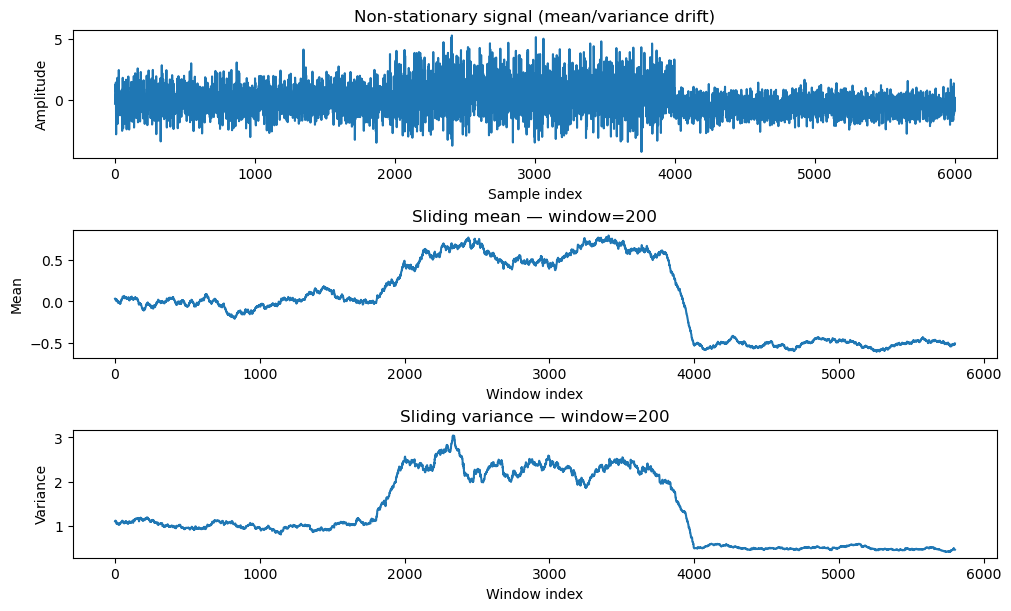

In [41]:

# Stationarity demo: piecewise-changing mean/variance with interactive window
st.stationarity_demo()


#### example RP Darts
We have now a game of dtars of one player over time. If we plot its scatter map, we will not see clearly what is hapenning on time. We can see the distribution, that looks ok, but...

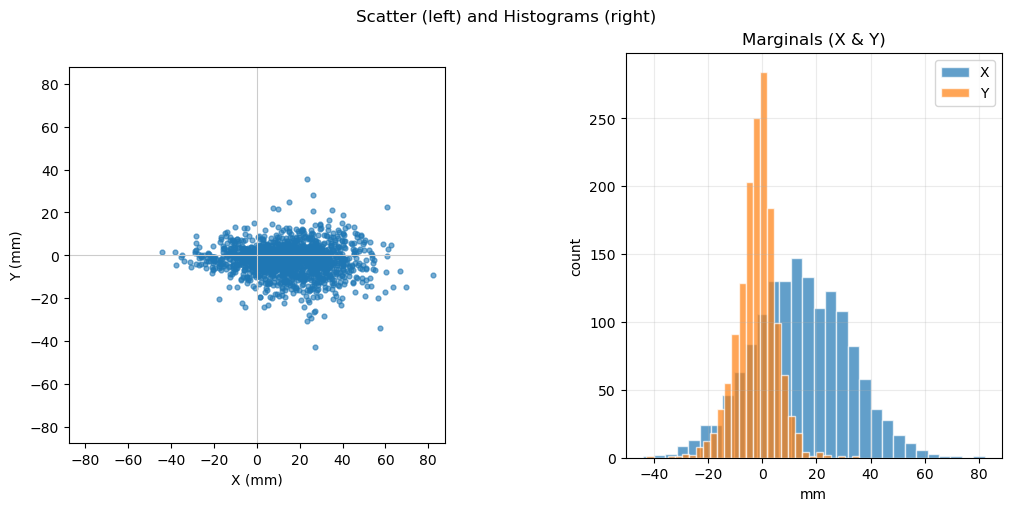

In [42]:
N=1500 # number of samples
df = dl.simulate_darts_timevarying(N=N)
dl.scatter_and_hist(df)

But if we plot the values of $X$ and $Y$ over time, with their mean and variance superimposed, we see that the statistics of the signal are changing with time.

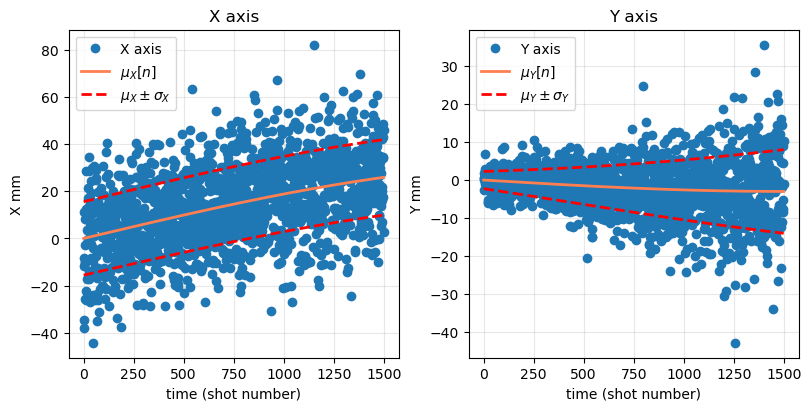

In [43]:
n = np.arange(N)
fig, axs = plt.subplots(1, 2, figsize=(8, 4), constrained_layout=True)
axs[0].plot(n, df["X"].to_numpy(), 'o', label="X axis", lw=1)
axs[0].plot(n, df["muX"].to_numpy(), color='coral', label="$\mu_X[n]$", lw=2) 
axs[0].plot(n, df["muX"].to_numpy() + df["sigX"].to_numpy(), 
            label="$\mu_X\pm \sigma_X$", color='red', linestyle='dashed', linewidth=2)
axs[0].plot(n, df["muX"].to_numpy() - df["sigX"].to_numpy(), 
            color='red', linestyle='dashed', linewidth=2)
axs[0].set_title("X axis"); 
axs[0].grid(True, alpha=0.3); 
axs[0].set_xlabel("time (shot number)")
axs[0].set_ylabel("X mm");
axs[0].legend()

axs[1].plot(n, df["Y"].to_numpy(), 'o', label="Y axis", lw=1)
axs[1].plot(n, df["muY"].to_numpy(), color='coral', label="$\mu_Y[n]$", lw=2) 
axs[1].plot(n, df["muY"].to_numpy() + df["sigY"].to_numpy(), 
            label="$\mu_Y\pm \sigma_Y$", color='red', linestyle='dashed', linewidth=2)
axs[1].plot(n, df["muY"].to_numpy() - df["sigY"].to_numpy(), 
            color='red', linestyle='dashed', linewidth=2)
axs[1].set_title("Y axis"); 
axs[1].grid(True, alpha=0.3); 
axs[1].set_xlabel("time (shot number)")
axs[1].set_ylabel("Y mm");
axs[1].legend();

In this case we would have to stimate the statistics with the time, selectimg a time window in which we assume stationarity to do the stimation, therefore we can understand how it behaves. In the next figure we can se the local mean and variances estimation.

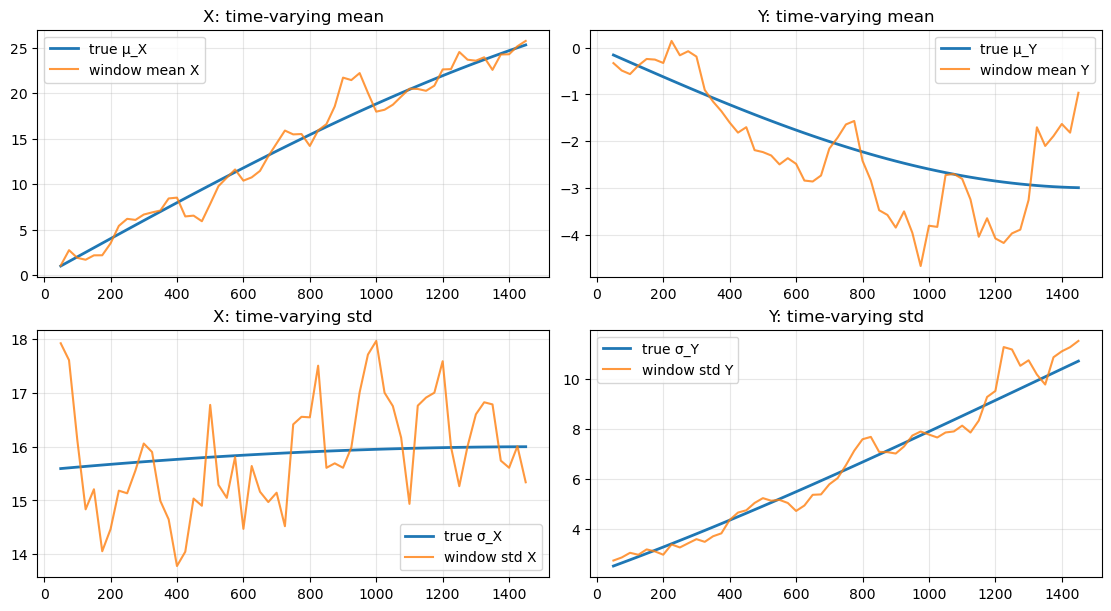

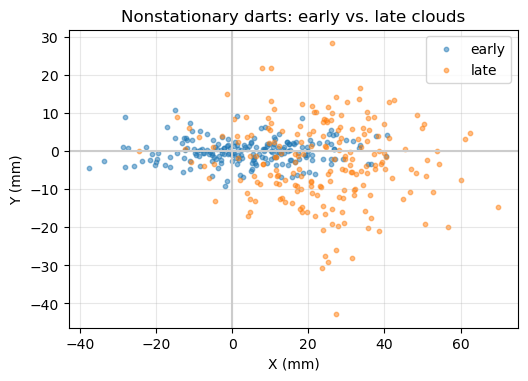

In [44]:
# --- visualize time variation of mean/variance (ground truth vs. local estimates)
win = 100  # sliding window length
step = 25  # hop between windows
idx = np.arange(0, len(df) - win + 1, step)

meanX = [df["X"].iloc[i:i+win].mean() for i in idx]
meanY = [df["Y"].iloc[i:i+win].mean() for i in idx]
stdX  = [df["X"].iloc[i:i+win].std(ddof=1) for i in idx]
stdY  = [df["Y"].iloc[i:i+win].std(ddof=1) for i in idx]

# Ground-truth downsampled to window centers for comparison
centers = idx + win//2
muX_c = df["muX"].to_numpy()[centers]
muY_c = df["muY"].to_numpy()[centers]
sigX_c = df["sigX"].to_numpy()[centers]
sigY_c = df["sigY"].to_numpy()[centers]

fig, axs = plt.subplots(2, 2, figsize=(11, 6), constrained_layout=True)
axs[0,0].plot(centers, muX_c, label="true μ_X", lw=2)
axs[0,0].plot(centers, meanX, label="window mean X", alpha=0.8)
axs[0,0].set_title("X: time-varying mean"); axs[0,0].grid(True, alpha=0.3); axs[0,0].legend()

axs[0,1].plot(centers, muY_c, label="true μ_Y", lw=2)
axs[0,1].plot(centers, meanY, label="window mean Y", alpha=0.8)
axs[0,1].set_title("Y: time-varying mean"); axs[0,1].grid(True, alpha=0.3); axs[0,1].legend()

axs[1,0].plot(centers, sigX_c, label="true σ_X", lw=2)
axs[1,0].plot(centers, stdX,  label="window std X", alpha=0.8)
axs[1,0].set_title("X: time-varying std"); axs[1,0].grid(True, alpha=0.3); axs[1,0].legend()

axs[1,1].plot(centers, sigY_c, label="true σ_Y", lw=2)
axs[1,1].plot(centers, stdY,  label="window std Y", alpha=0.8)
axs[1,1].set_title("Y: time-varying std"); axs[1,1].grid(True, alpha=0.3); axs[1,1].legend()

plt.show()

# --- scatter in early vs late windows to *see* nonstationarity
early = df.iloc[100:300][["X","Y"]].to_numpy()
late  = df.iloc[-300:-100][["X","Y"]].to_numpy()

fig, ax = plt.subplots(figsize=(5.8, 5.8))
ax.scatter(early[:,0], early[:,1], s=10, alpha=0.5, label="early")
ax.scatter(late[:,0],  late[:,1],  s=10, alpha=0.5, label="late")
ax.axhline(0, color="#cccccc"); ax.axvline(0, color="#cccccc")
ax.set_aspect("equal", adjustable="box")
ax.set_title("Nonstationary darts: early vs. late clouds")
ax.set_xlabel("X (mm)"); ax.set_ylabel("Y (mm)")
ax.legend(); ax.grid(True, alpha=0.3)
plt.show()